* This notebook explores data augmentation techniques and visualizes their impact on the dataset. 
* Data augmentation helps in enhancing the diversity of the training dataset without actually collecting new data. 
* For this project, we will first convert the images to grayscale and then apply data augmentation.

In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import os

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from utils.config import load_config

### Load data paths from config

In [7]:
config = load_config()
train_dir = config['data_paths']['images_raw']

In [10]:
classes = os.listdir(train_dir)

### Visualize augmented images for a sample image

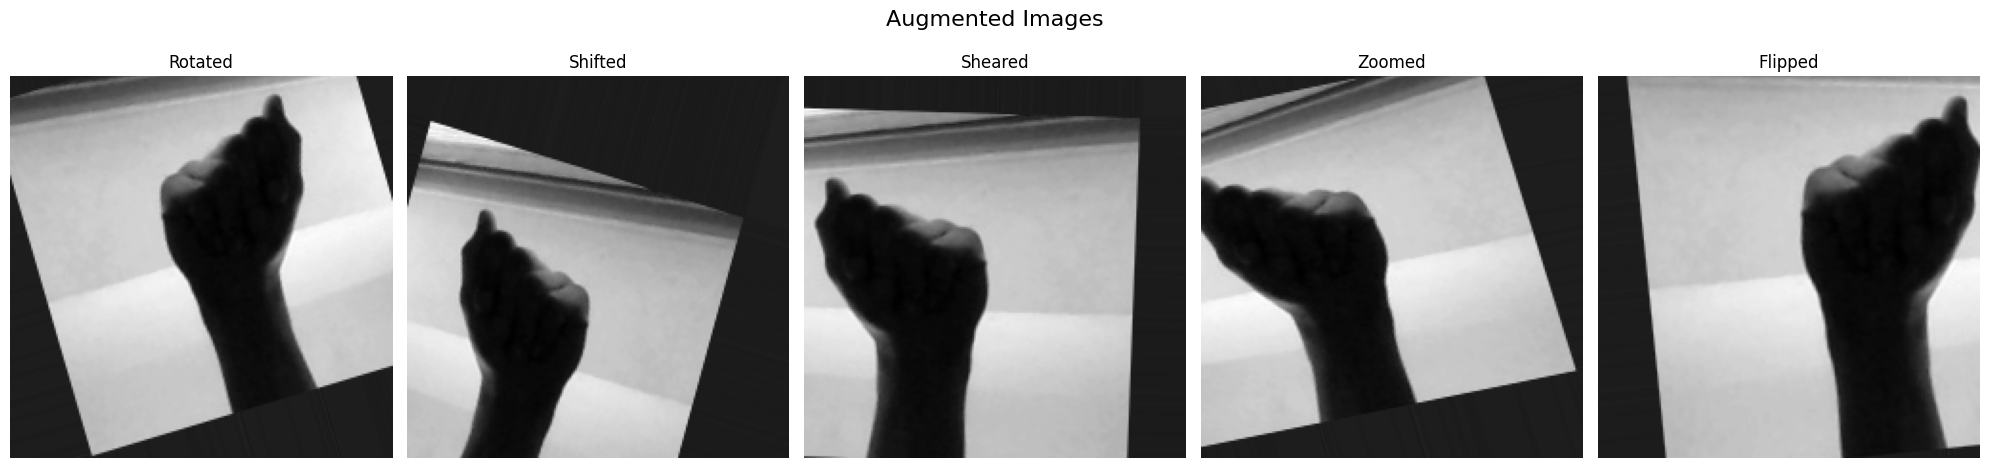

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    return img

def visualize_augmentation(image_path, datagen, num_images=5):
    grayscale_img = convert_to_grayscale(image_path)
    img = np.array(grayscale_img).reshape((1,) + grayscale_img.size + (1,))
    fig, axes = plt.subplots(1, num_images, figsize=(20, 5))
    fig.suptitle('Augmented Images', fontsize=16)
    
    augmentations = ['Original', 'Rotated', 'Shifted', 'Sheared', 'Zoomed', 'Flipped']
    
    for i, batch in enumerate(datagen.flow(img, batch_size=1)):
        axes[i].imshow(batch[0].astype('uint8'), cmap='gray')
        axes[i].set_title(augmentations[i+1])
        axes[i].axis('off')
        if i >= num_images - 1:
            break
    
    plt.tight_layout()
    plt.show()

sample_image_path = os.path.join(train_dir, 'A', os.listdir(os.path.join(train_dir, 'A'))[0])
visualize_augmentation(sample_image_path, datagen)


### Impact of Augmentation on Different Classes

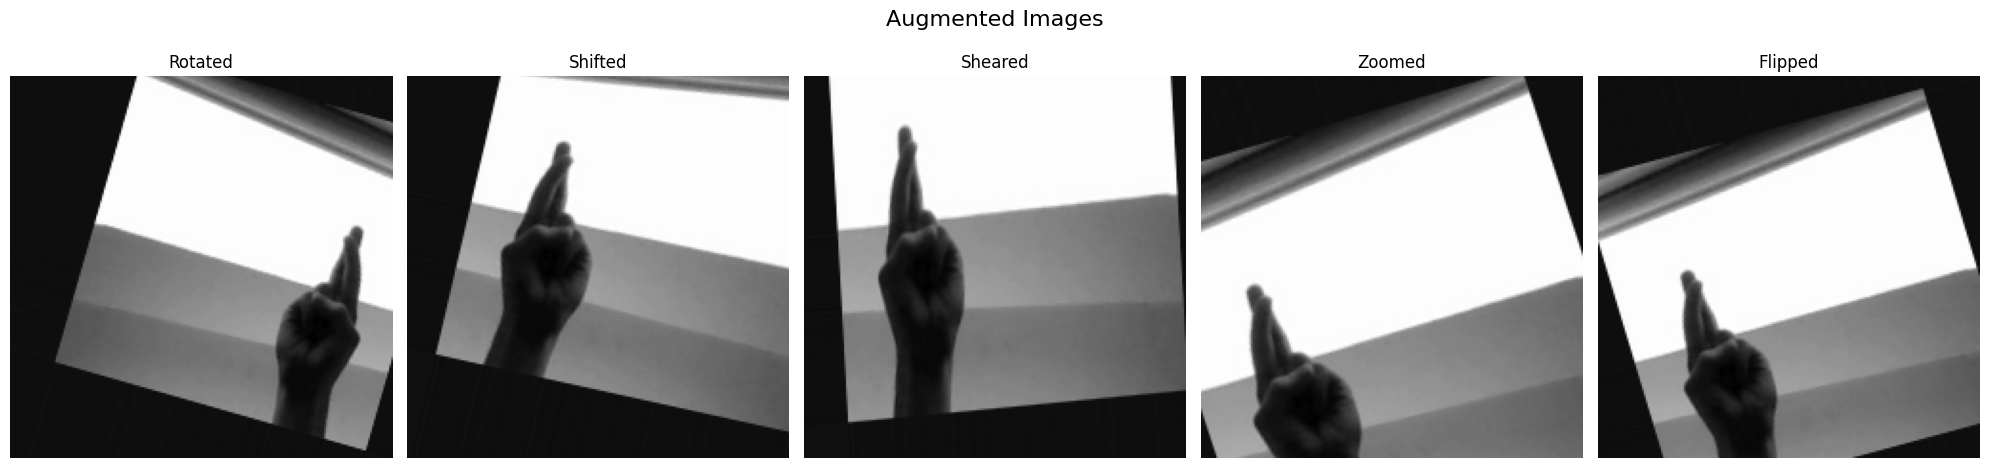

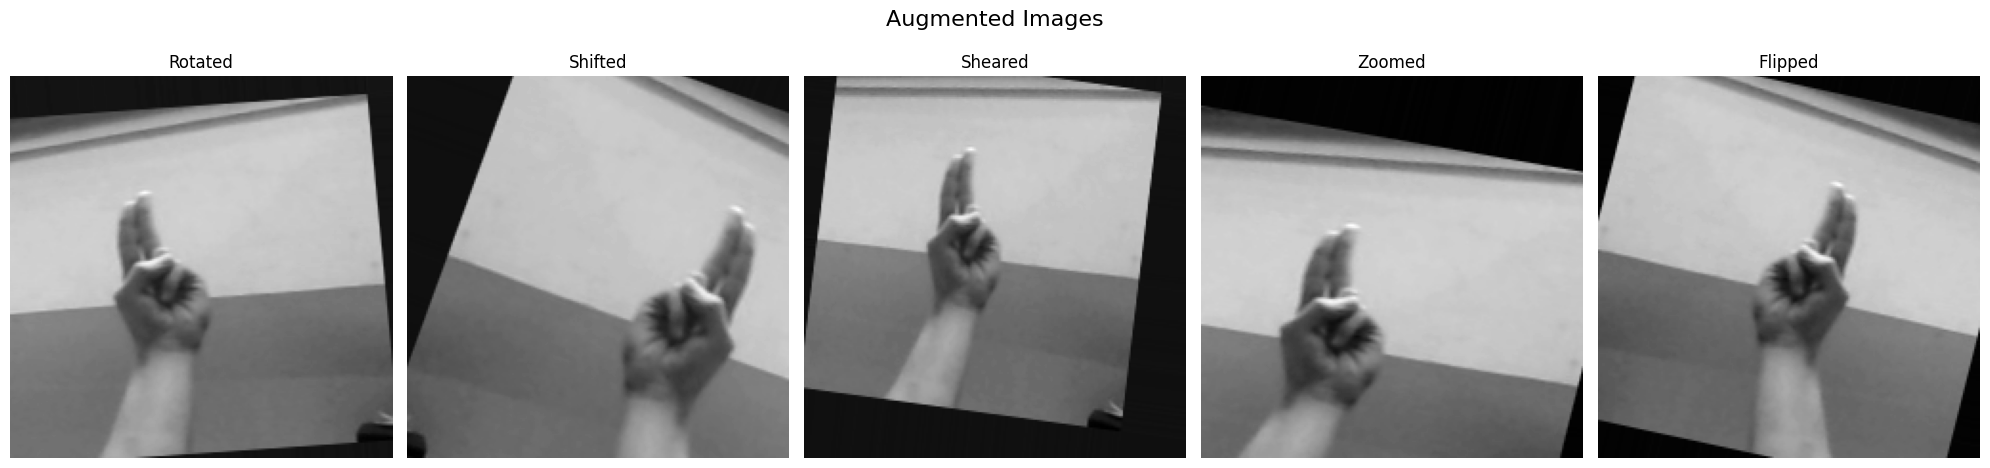

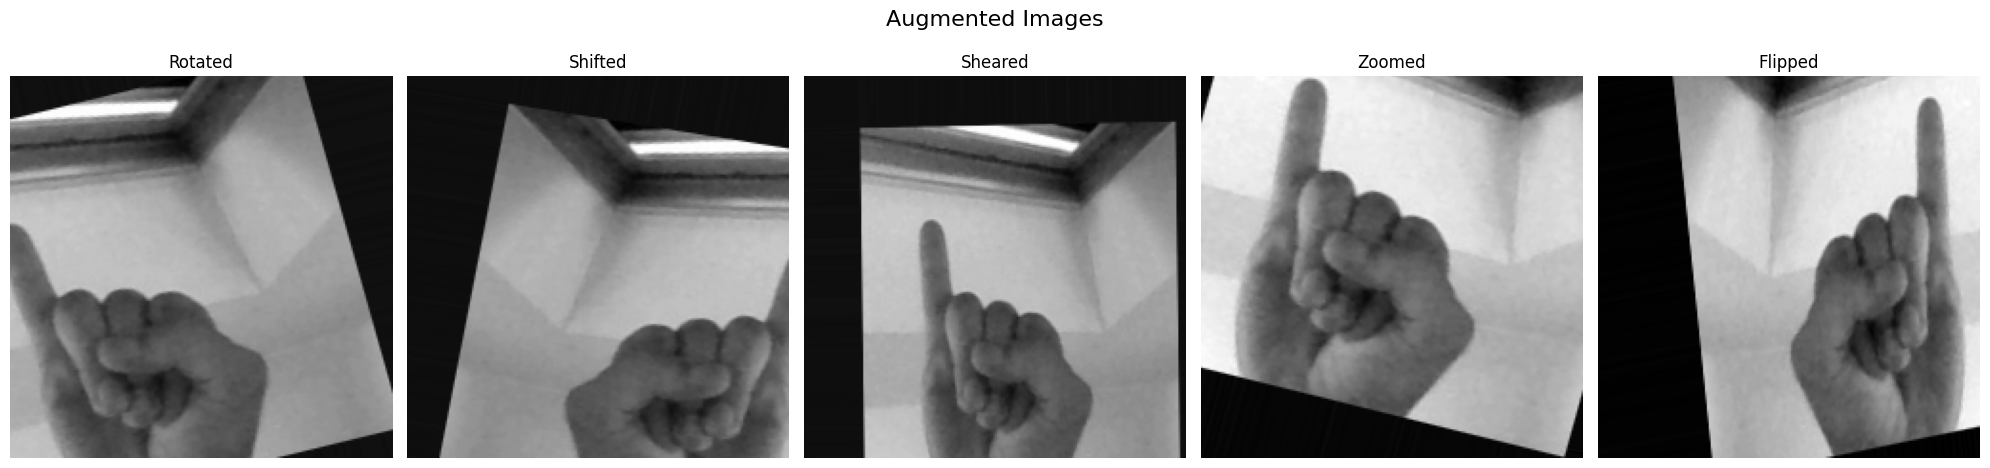

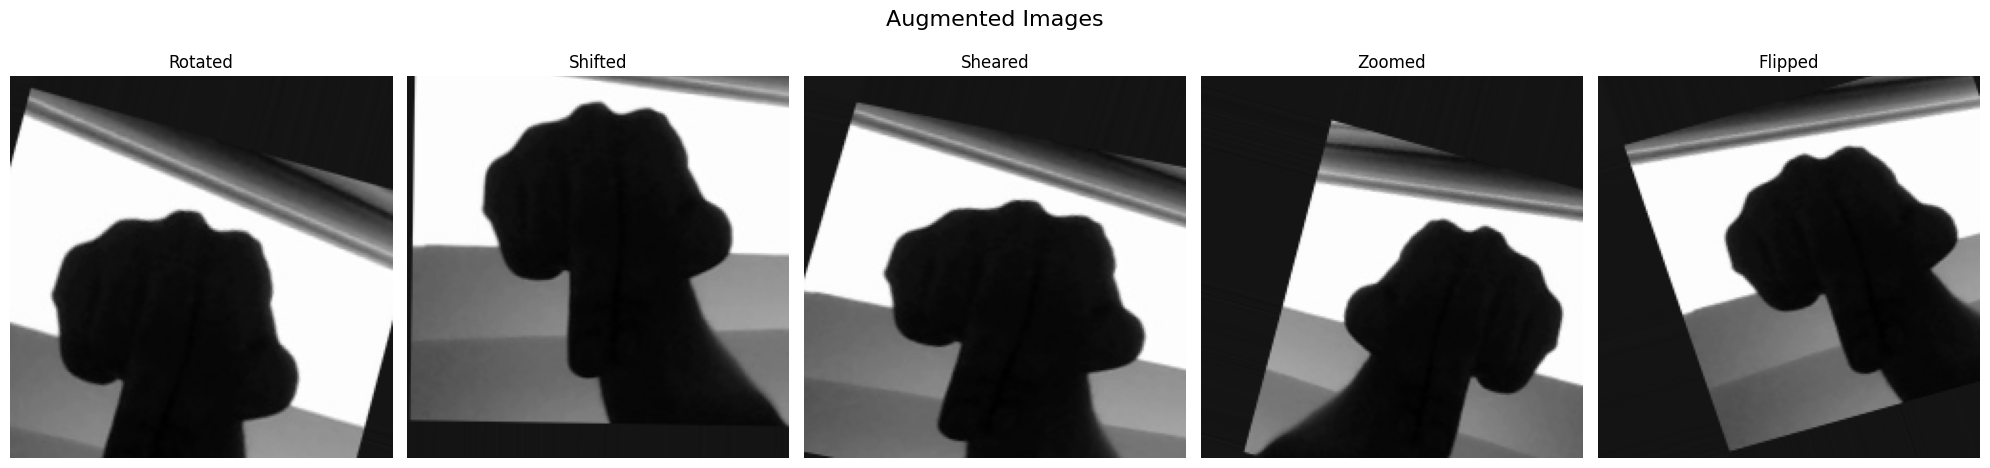

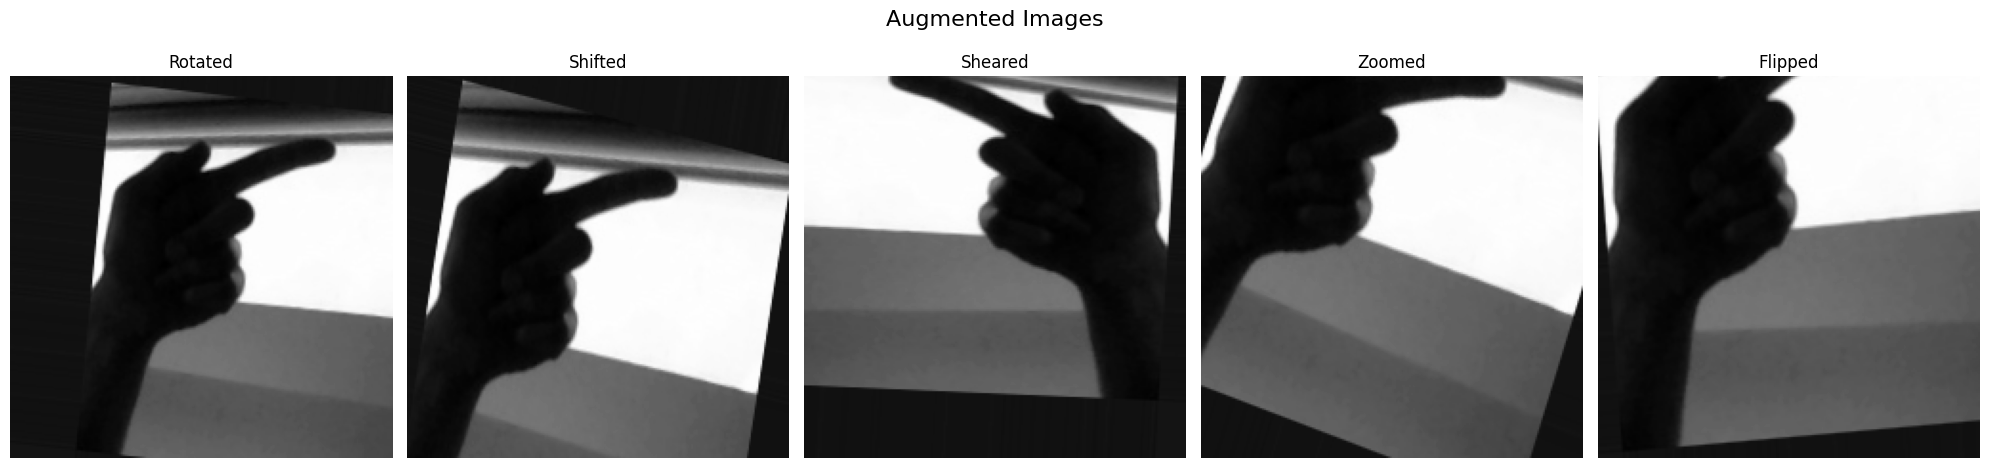

In [24]:
# Visualize augmentation impact across different classes
for cls in classes[:5]:
    sample_image_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    visualize_augmentation(sample_image_path, datagen)


* Data augmentation is an effective technique to increase the diversity of the training dataset. 
* By applying transformations such as rotation, shift, shear, zoom, and flip, the model can generalize better and improve its performance on unseen data. 
* This notebook demonstrated the impact of these augmentations on sample images from different classes, showcasing the potential of augmented data in enhancing model robustness.
* Quantitative evaluation of augmentation effectiveness will be performed during the model training phase.